<a href="https://www.kaggle.com/code/bhavinmoriya/probability-distributions-at-ease?scriptVersionId=111562777" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import norm, gamma, uniform, beta, binom, geom, expon, poisson

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Normal Distribution

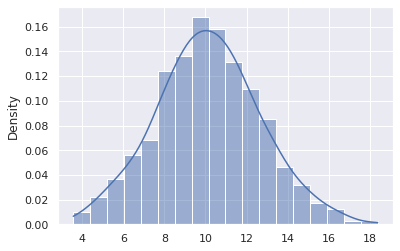

In [2]:
x = norm.rvs(10.0, 2.5, size=500)
# Fit a normal distribution to the data:
mu, std = norm.fit(x)
sns.histplot(x, kde=True, stat='density');

<AxesSubplot:ylabel='Density'>

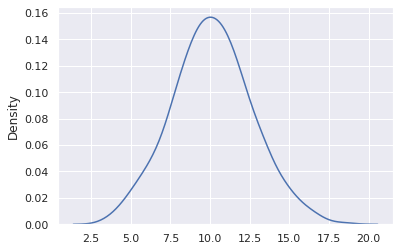

In [3]:
sns.kdeplot(x)

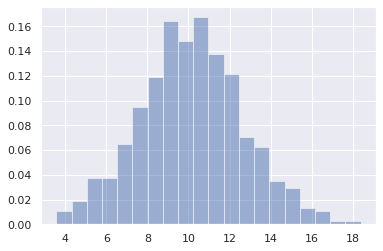

In [4]:
plt.hist(x, density=True, alpha=.5, bins=20);

# Prob Density Function and Cumulative Distribution Fun

PDF of Normal Dist : $$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\cdot \exp\left(\frac{1}{2}\cdot \left(\frac{x-\mu}{\sigma}\right)^2\right)$$

CDF of Normal Dist : $$\displaystyle{\int_{-\infty}^x f(x) \ dx}$$

Check, https://en.wikipedia.org/wiki/Normal_distribution#Cumulative_distribution_functions

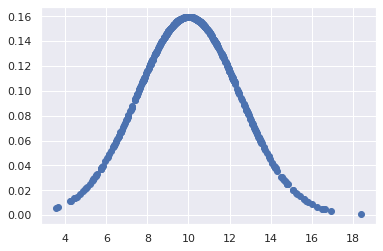

In [5]:
# since 99% of data is withing 3 std of the mean we shall take 4 std from mean and we will see that pdf will cover all.
plt.scatter(x,norm.pdf(x, 10, 2.5))

Since x did not have enough points above graph does not seem very smooth, more specifically at both ends. We can smooth it out by adding lots of values to x.

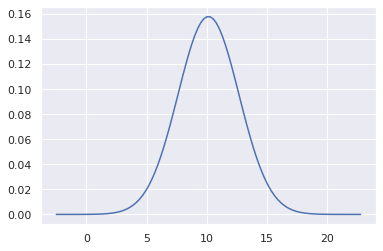

In [6]:
x = np.linspace(mu - 5*std, mu + 5*std, 100)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf)

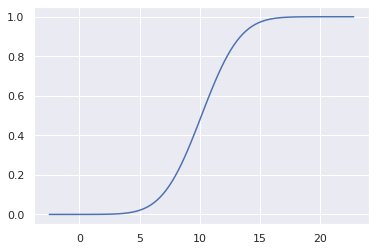

In [7]:
cdf = norm.cdf(x, mu, std)
plt.plot(x, cdf)
# plt.axvline(10)

# Percent point function
CDF(a) gives the probability of random variable to be <= a. What if, we want the value of a for given probability. Exactly, this is called inverse function. PPF is an inverse function of CDF.

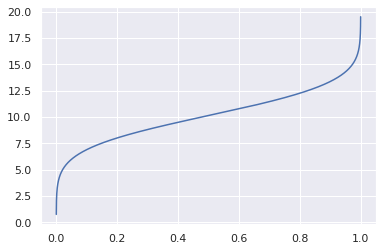

In [8]:
cdf_ = np.linspace(0,1,10000)
ppf_ = norm.ppf(cdf_, mu, std)
plt.plot(cdf_,ppf_);

# Application of PPF and CDF

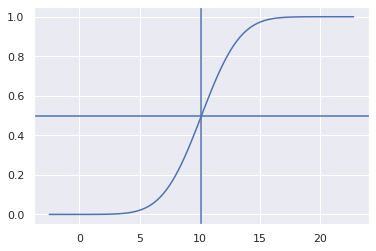

In [9]:
# What is the value of x for which probability is 50%
x_50 = norm.ppf(.5, mu, std)
cdf = norm.cdf(x, mu, std)
plt.plot(x, cdf)
plt.axvline(x_50)
plt.axhline(.5)

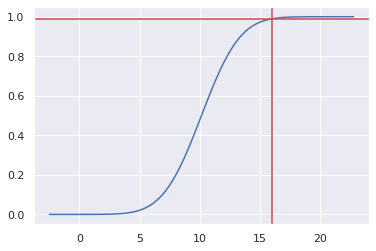

In [10]:
# What is the value of x for which probability is 99%
x_99 = norm.ppf(.99, mu, std)
# cdf = norm.cdf(x, mu, std)
plt.plot(x, cdf)
plt.axvline(x_99, c='r')
plt.axhline(.99, c='r')

0.999081543717484


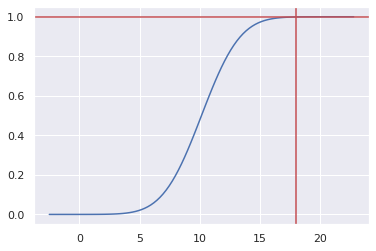

In [11]:
# What is the prob of rv is <= 18
cdf_18 = norm.cdf(18, mu, std)
plt.plot(x, cdf)
plt.axhline(cdf_18, c='r')
plt.axvline(18, c='r')
print(cdf_18)

In [12]:
for i in range(10):
    print(f'Probability of a data lying below {i+1} - STD is {norm.cdf(mu + std * (i+1), mu, std)}')

Probability of a data lying below 1 - STD is 0.8413447460685429
Probability of a data lying below 2 - STD is 0.9772498680518208
Probability of a data lying below 3 - STD is 0.9986501019683699
Probability of a data lying below 4 - STD is 0.9999683287581669
Probability of a data lying below 5 - STD is 0.9999997133484281
Probability of a data lying below 6 - STD is 0.9999999990134123
Probability of a data lying below 7 - STD is 0.9999999999987201
Probability of a data lying below 8 - STD is 0.9999999999999993
Probability of a data lying below 9 - STD is 1.0
Probability of a data lying below 10 - STD is 1.0


# Gamma Distribution

Text(0.5, 0.98, 'Gamma Distribution')

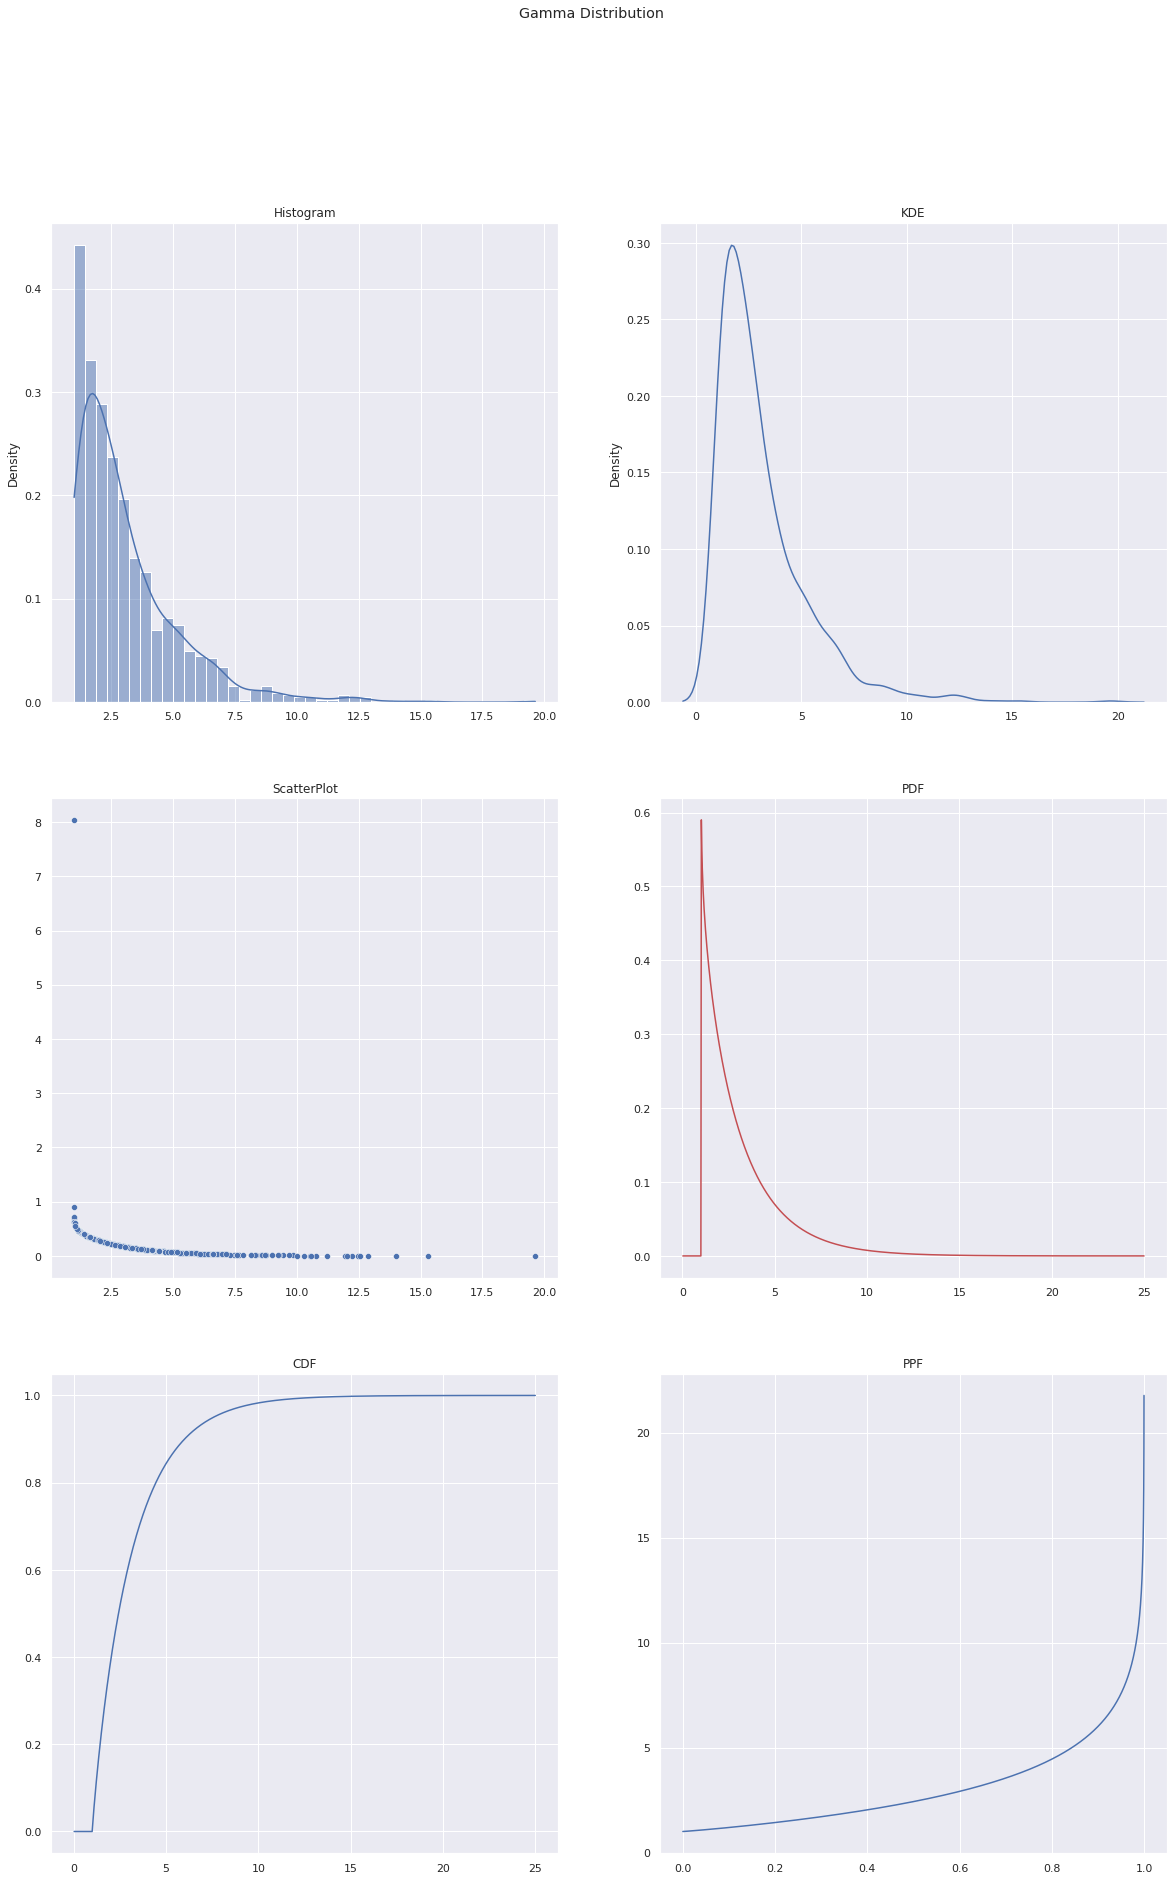

In [13]:
# We will basically follow the same steps as in the normal dist
# Generate data
x = gamma.rvs(a=1, loc=1, scale=2, size=1000)
# Fit a normal distribution to the data:
a, loc, scale = gamma.fit(x)

fig, ax = plt.subplots(3,2, figsize=(20,30))
ax = ax.flatten()
sns.histplot(x, kde=True, stat='density', ax=ax[0]);
ax[0].set_title('Histogram')

# help(gamma)

sns.kdeplot(x, ax=ax[1])
ax[1].set_title('KDE')

# Scatter
sns.scatterplot(x=x, y=gamma.pdf(x, a=a,
                         loc=loc, scale=scale
                        ),
            ax=ax[2]
                        )
ax[2].set_title('ScatterPlot')

# PDF
x = np.linspace(0, 25, 1000)[1:]
pdf = gamma.pdf(x, a, loc, scale)
ax[3].plot(x, pdf, c='r')
ax[3].set_title('PDF')

# CDF
cdf = gamma.cdf(x, a, loc, scale)
ax[4].plot(x, cdf)
ax[4].set_title('CDF')
# plt.axvline(10)

# PPF
cdf_ = np.linspace(0,1,10000)
ppf_ = gamma.ppf(cdf_, a, loc, scale)
ax[5].plot(cdf_,ppf_);
ax[5].set_title('PPF')

plt.suptitle('Gamma Distribution')

# Uniform Distribution

In [14]:
uniform.rvs(size=10)

array([0.56712335, 0.06313538, 0.97761486, 0.52174532, 0.96126804,
       0.10972059, 0.13885925, 0.55901133, 0.14101206, 0.60862079])

Text(0.5, 0.98, 'Uniform Distribution')

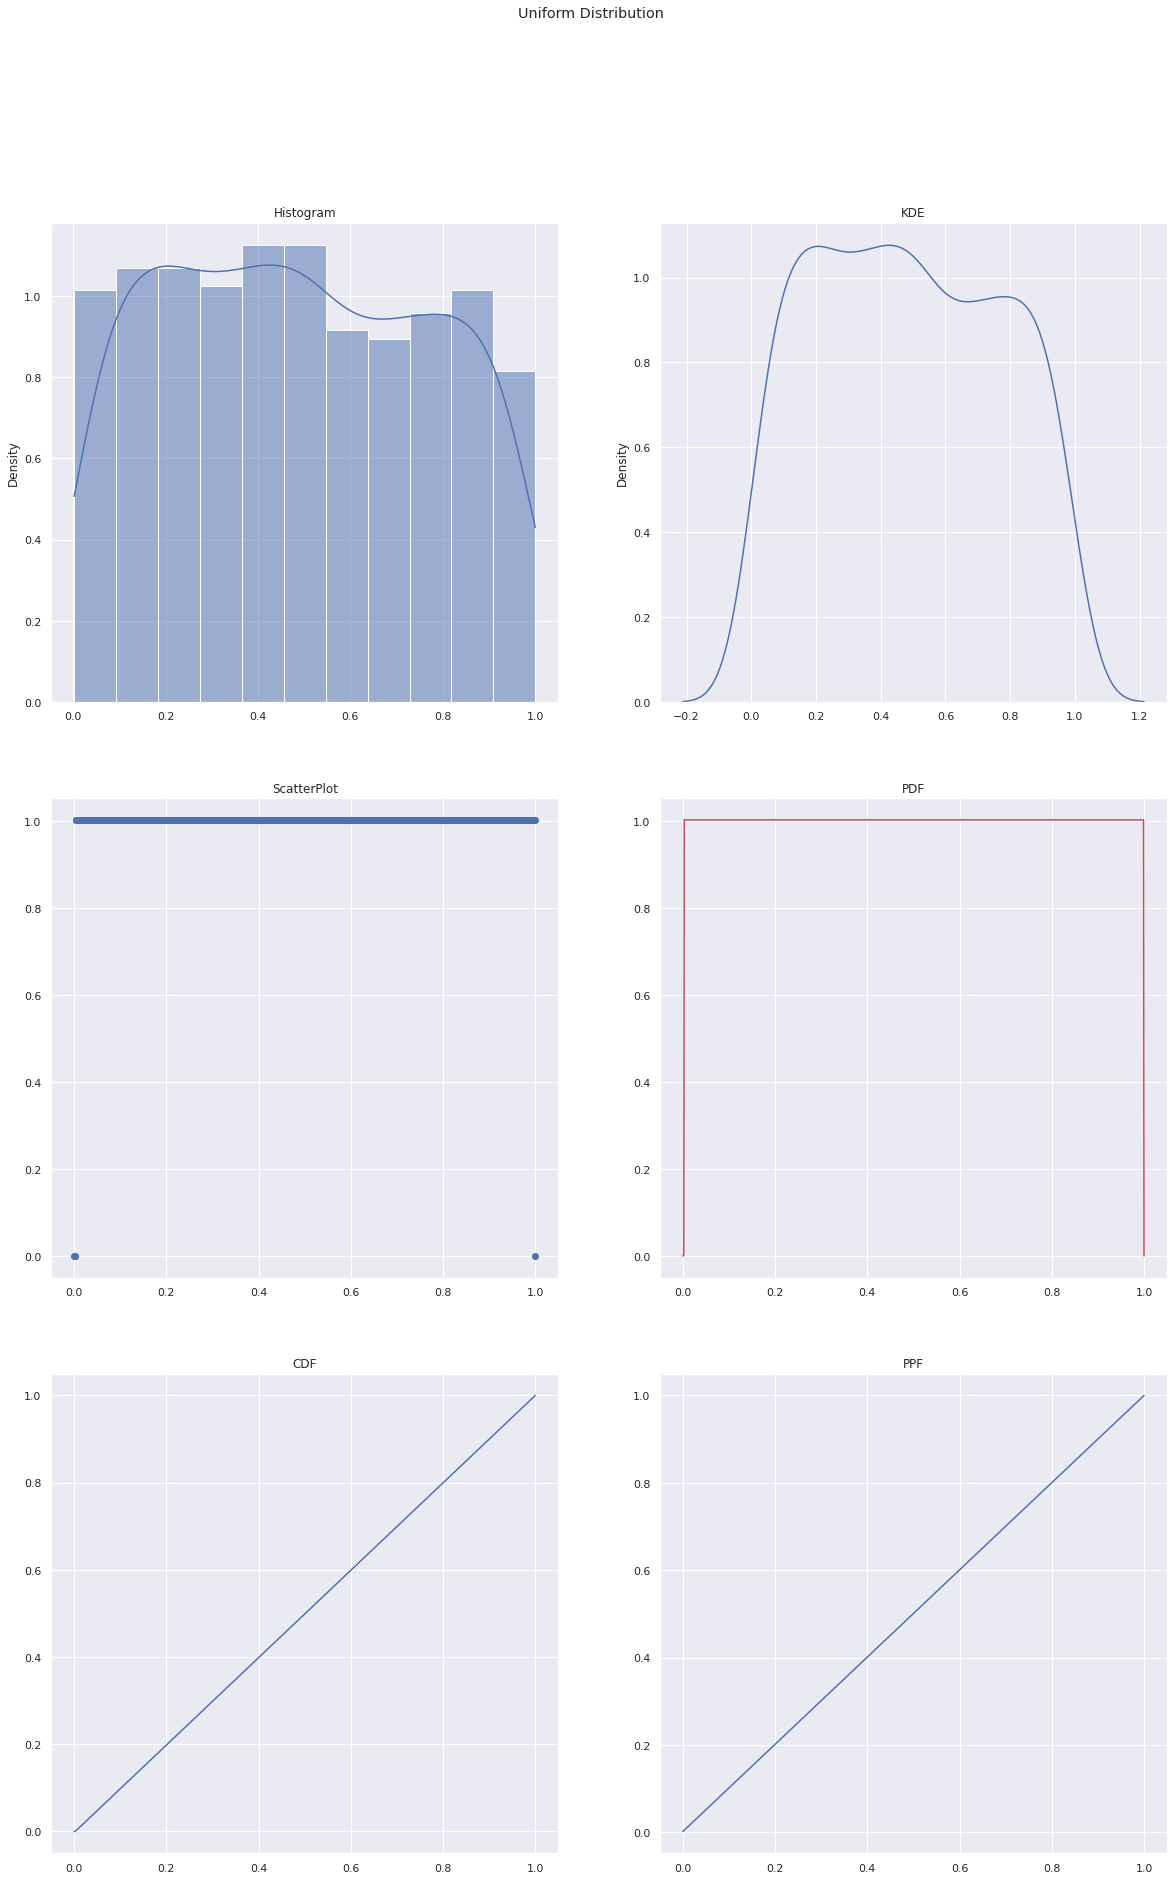

In [15]:
# We will basically follow the same steps as in the normal dist
# Generate data
loc=0
scale=1
x = uniform.rvs(loc=0, scale=1, size=1000) # from 0 to 1 1000 numbers chosen (any no has same prob of being chosen)
# Fit a normal distribution to the data:
loc, scale = uniform.fit(x)

fig, ax = plt.subplots(3,2, figsize=(20,30))
ax = ax.flatten()
sns.histplot(x, kde=True, stat='density', ax=ax[0]);
ax[0].set_title('Histogram')

# help(gamma)

sns.kdeplot(x, ax=ax[1])
ax[1].set_title('KDE')

# Scatter
x = np.linspace(0, 1, 1000)
ax[2].scatter(x=x, y=uniform.pdf(x,
                         loc=loc, scale=scale
                        )
                        )
ax[2].set_title('ScatterPlot')

# PDF

pdf = uniform.pdf(x, loc, scale)
ax[3].plot(x, pdf, c='r')
ax[3].set_title('PDF')

# CDF
cdf = uniform.cdf(x, loc, scale)
ax[4].plot(x, cdf)
ax[4].set_title('CDF')
# plt.axvline(10)

# PPF
cdf_ = np.linspace(0,1,10000)
ppf_ = uniform.ppf(cdf_, loc, scale)
ax[5].plot(cdf_,ppf_);
ax[5].set_title('PPF')

plt.suptitle('Uniform Distribution')

# Binomial Distribution

In [16]:
# We will basically follow the same steps as in the normal dist
# Generate data
def binomial_dist(n=10, p=.5):
#     n=10
#     p=.5
    x = binom.rvs(n=n, # no of flips per trial
                  p=p, # prob of success
                  size=10000) # from 0 to 1 10000 numbers chosen (any no has same prob of being chosen)

    fig, ax = plt.subplots(3,2, figsize=(20,30))
    ax = ax.flatten()
    sns.histplot(x, kde=True, stat='density', ax=ax[0]);
    ax[0].set_title('Histogram')

    # help(gamma)

    sns.kdeplot(x, ax=ax[1])
    ax[1].set_title('KDE')

    # Scatter
    ax[2].scatter(x=x, y=binom.pmf(x, p=p, n=n
                            )
                            )
    ax[2].set_title('ScatterPlot')

    # PMF : Prob Mass Func
    '''binom.pmf(k=x, # k is number of success in n trials
                    p=.5, 
                    n=10 # trials
                   )
    is a prob of getting k success in n trials'''
    success = np.array([i for i in range(11)])
    pmf = binom.pmf(k=success, # k is number of success in n trials
                    p=p, 
                    n=n # trials
                   )
    ax[3].plot(success, pmf, c='r')
    ax[3].set_title('PMF')

    # CDF
    '''binom.cdf(k=i, 
                    p=.5, 
                    n=10 # trials
                   )
                   is a prob of getting <= k success in n trials'''
    cdf = [binom.cdf(k=i, 
                    p=p, 
                    n=n # trials
                   )
           for i in range(11)]
    ax[4].plot([i for i in range(11)], cdf)
    ax[4].set_title('CDF')
    # plt.axvline(10)

    # PPF
    cdf_ = cdf
    ppf_ = binom.ppf(cdf_, 
    #                  k=x, 
                     p=p, 
                     n=n # trials
                    )
    ax[5].plot(cdf_,ppf_);
    ax[5].set_title('PPF')

    plt.suptitle('Binomial Distribution')

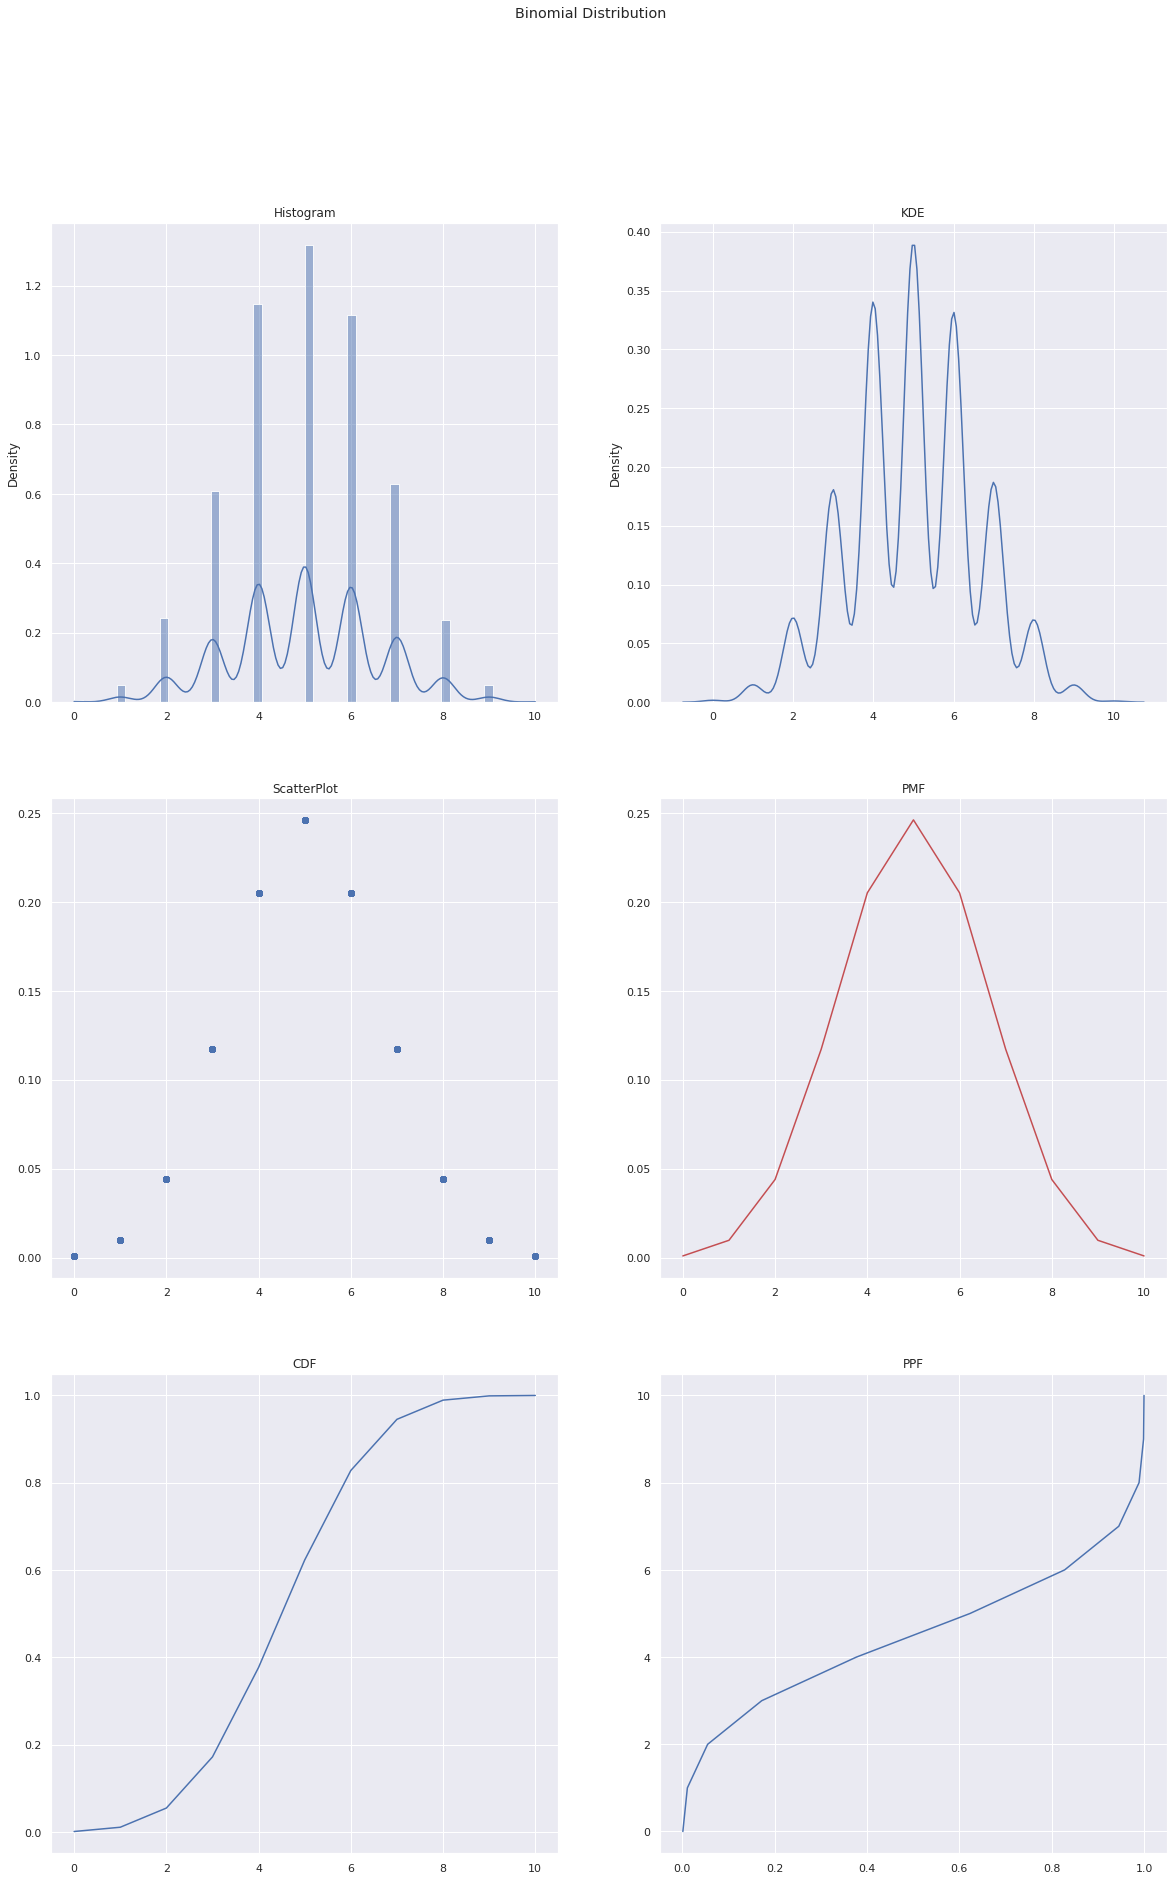

In [17]:
binomial_dist(n=10, p=.5)

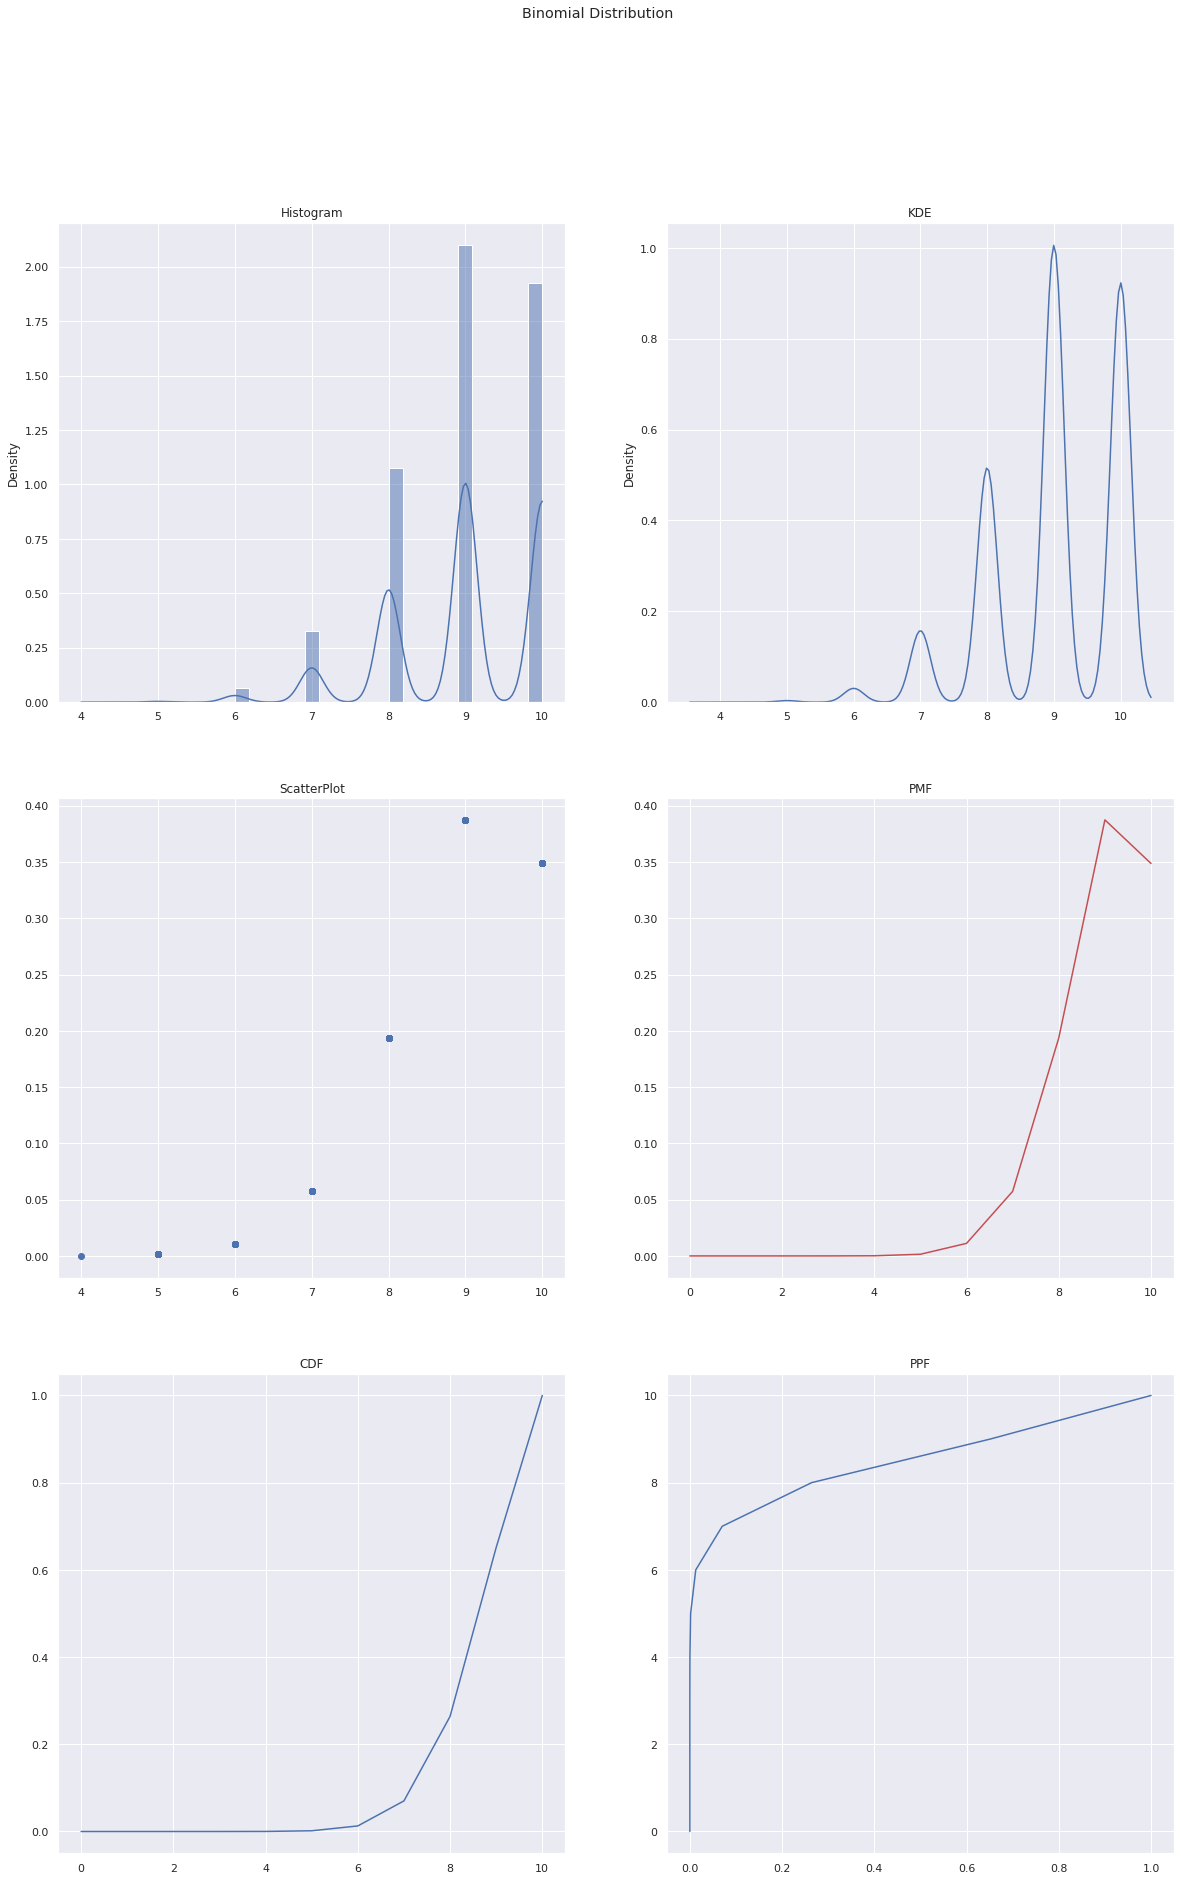

In [18]:
binomial_dist(n=10, p=.9)

# Geometric Dist

In [19]:
# We will basically follow the same steps as in the normal dist
# Generate data
def geometric_dist(p=.5):
    x = geom.rvs(p=p, # prob of success
                 size=10000) # from 0 to 1 10000 numbers chosen (any no has same prob of being chosen)

    fig, ax = plt.subplots(3,2, figsize=(20,30))
    ax = ax.flatten()
    sns.histplot(x, kde=True, stat='density', ax=ax[0]);
    ax[0].set_title('Histogram')

    # help(gamma)

    sns.kdeplot(x, ax=ax[1])
    ax[1].set_title('KDE')

    # Scatter
    success = np.array([i+1 for i in range(50)])
    ax[2].scatter(x=success, 
                     y=geom.pmf(success, p=.5
                            )
                  )
    ax[2].set_title('ScatterPlot')

    # PMF : Prob Mass Func
    '''binom.pmf(k=x, # k is number of success in n trials
                    p=.5, 
                    n=10 # trials
                   )
    is a prob of getting k success in n trials'''
#     success = np.array([i+1 for i in range(50)])
    pmf = geom.pmf(k=success, # prob of success at k-th step
                    p=.5, 
#                     n=10 # trials
                   )
    ax[3].plot(success, pmf, c='r')
    ax[3].set_title('PMF')

    # CDF
    '''binom.cdf(k=i, 
                    p=.5, 
                    n=10 # trials
                   )
                   is a prob of getting <= k success in n trials'''
    cdf = [geom.cdf(k=i, # prob of success in <= k-th step
                    p=.5, 
#                     n=10 # trials
                   )
           for i in range(50)]
    ax[4].plot([i for i in range(50)], cdf)
    ax[4].set_title('CDF')
    # plt.axvline(10)

    # PPF
    cdf_ = cdf
    ppf_ = geom.ppf(cdf_, 
    #                  k=x, 
                     p=.5, 
#                      n=10 # trials
                    )
    ax[5].plot(cdf_,ppf_);
    ax[5].set_title('PPF')

    plt.suptitle('Geometric Distribution')

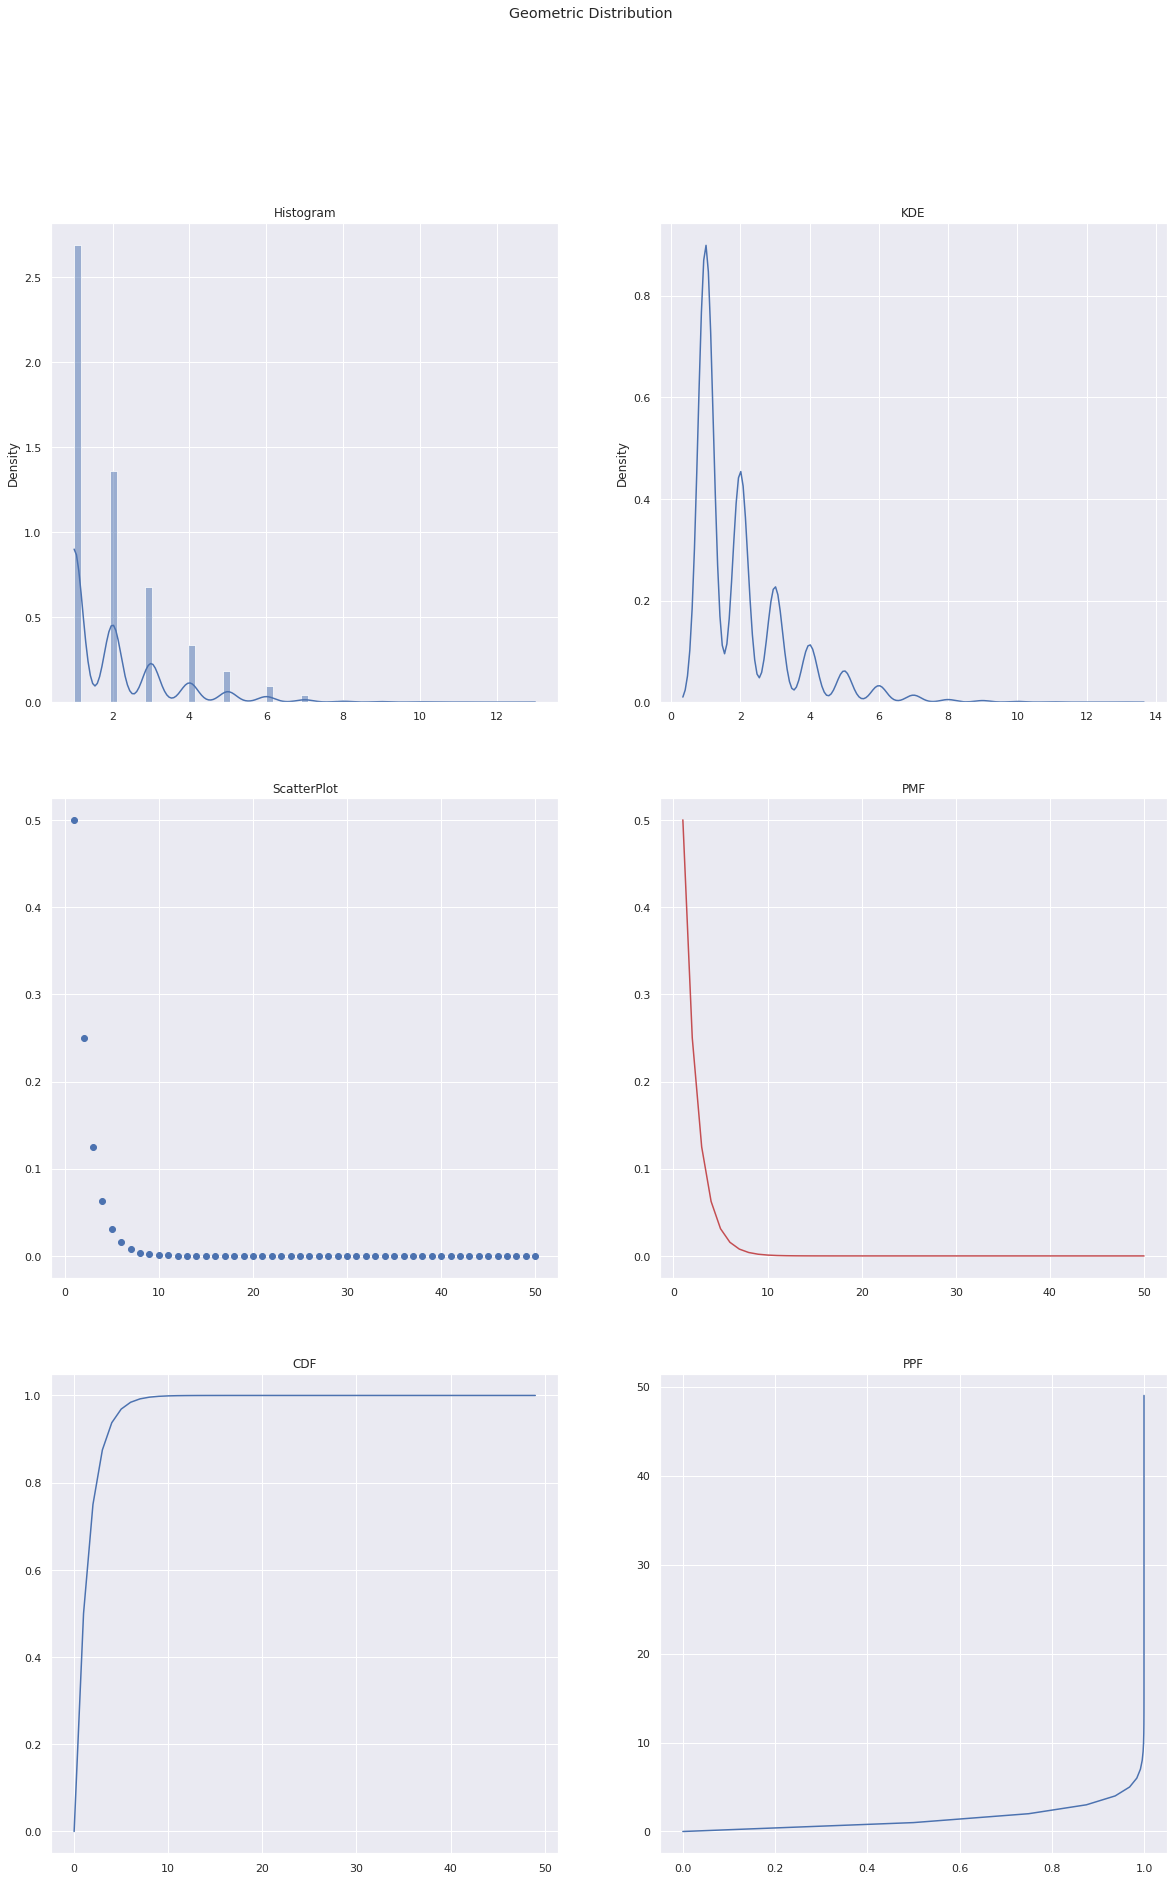

In [20]:
geometric_dist()

# Exponential Dist

In [21]:
# We will basically follow the same steps as in the normal dist
# Generate data
def exponential_dist(loc=0, scale=1):
    x = expon.rvs(loc=loc, scale =scale, size=10000) # from 0 to 1 10000 numbers chosen (any no has same prob of being chosen)

    fig, ax = plt.subplots(3,2, figsize=(20,30))
    ax = ax.flatten()
    sns.histplot(x, kde=True, stat='density', ax=ax[0]);
    ax[0].set_title('Histogram')

    # help(gamma)

    sns.kdeplot(x, ax=ax[1])
    ax[1].set_title('KDE')

    # Scatter
    success = np.linspace(-1,20,100)
    ax[2].scatter(x=success, 
                     y=expon.pdf(success)
                            
                  )
    ax[2].set_title('ScatterPlot')

    # PDF : Prob Density Func
    '''binom.pmf(k=x, # k is number of success in n trials
                    p=.5, 
                    n=10 # trials
                   )
    is a prob of getting k success in n trials'''
#     success = np.array([i+1 for i in range(50)])
    pdf = expon.pdf(
        x=success # prob of success at k-th step
#                     p=.5, 
#                     n=10 # trials
                   )
    ax[3].plot(success, pdf, c='r')
    ax[3].set_title('PMF')

    # CDF
    
    cdf = expon.cdf(x=success, # prob of success in <= k-th step
#                     p=.5, 
#                     n=10 # trials
                   )
          
    ax[4].plot(success, cdf)
    ax[4].set_title('CDF')
    # plt.axvline(10)

    # PPF
    cdf_ = cdf
    ppf_ = expon.ppf(cdf_, 
    #                  k=x, 
#                      p=.5, 
#                      n=10 # trials
                    )
    ax[5].plot(cdf_,ppf_);
    ax[5].set_title('PPF')

    plt.suptitle('Exponential Distribution')


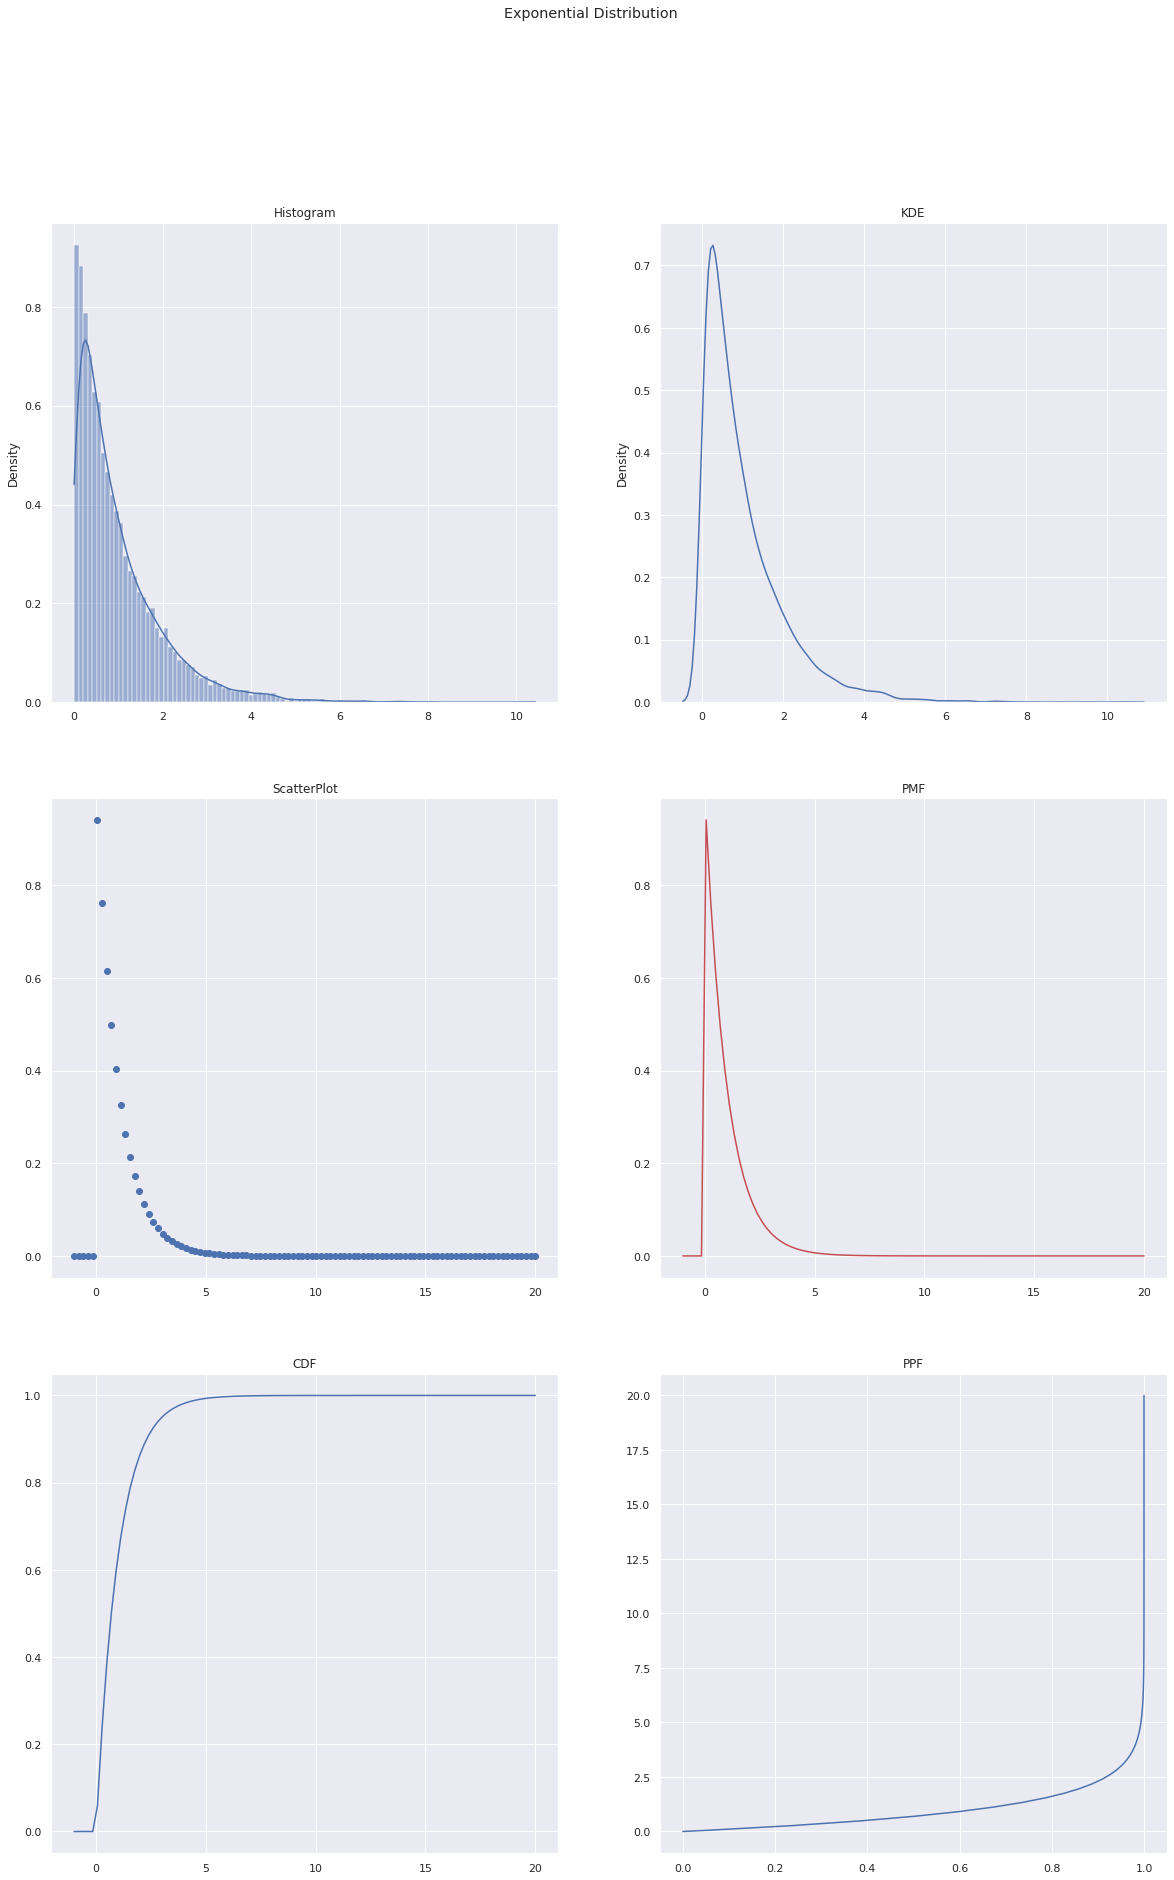

In [22]:
exponential_dist()

In [23]:
# We will basically follow the same steps as in the normal dist
# Generate data
def poisson_dist(mu=1):
    x = poisson.rvs(mu=mu, size=10000) # from 0 to 1 10000 numbers chosen (any no has same prob of being chosen)

    fig, ax = plt.subplots(3,2, figsize=(20,30))
    ax = ax.flatten()
    sns.histplot(x, kde=True, stat='density', ax=ax[0]);
    ax[0].set_title('Histogram')

    # help(gamma)

    sns.kdeplot(x, ax=ax[1])
    ax[1].set_title('KDE')

    # Scatter
    success = np.arange(0,20)
    ax[2].scatter(x=success, 
                     y=poisson.pmf(k=success, mu=mu)
                            
                  )
    ax[2].set_title('ScatterPlot')

    # PDF : Prob Density Func
    
#     success = np.array([i+1 for i in range(50)])
    pdf = poisson.pmf(
        k=success,
        mu=mu# prob of success at k-th step
#                     p=.5, 
#                     n=10 # trials
                   )
    ax[3].plot(success, pdf, c='r')
    ax[3].set_title('PMF')

    # CDF
    
    cdf = poisson.cdf(k=success, # prob of success in <= k-th step
                      mu=mu
#                     p=.5, 
#                     n=10 # trials
                   )
          
    ax[4].plot(success, cdf)
    ax[4].set_title('CDF')
    # plt.axvline(10)

    # PPF
    cdf_ = cdf
    ppf_ = poisson.ppf(cdf_, mu=mu
    #                  k=x, 
#                      p=.5, 
#                      n=10 # trials
                    )
    ax[5].plot(cdf_,ppf_);
    ax[5].set_title('PPF')

    plt.suptitle('Poisson Distribution')


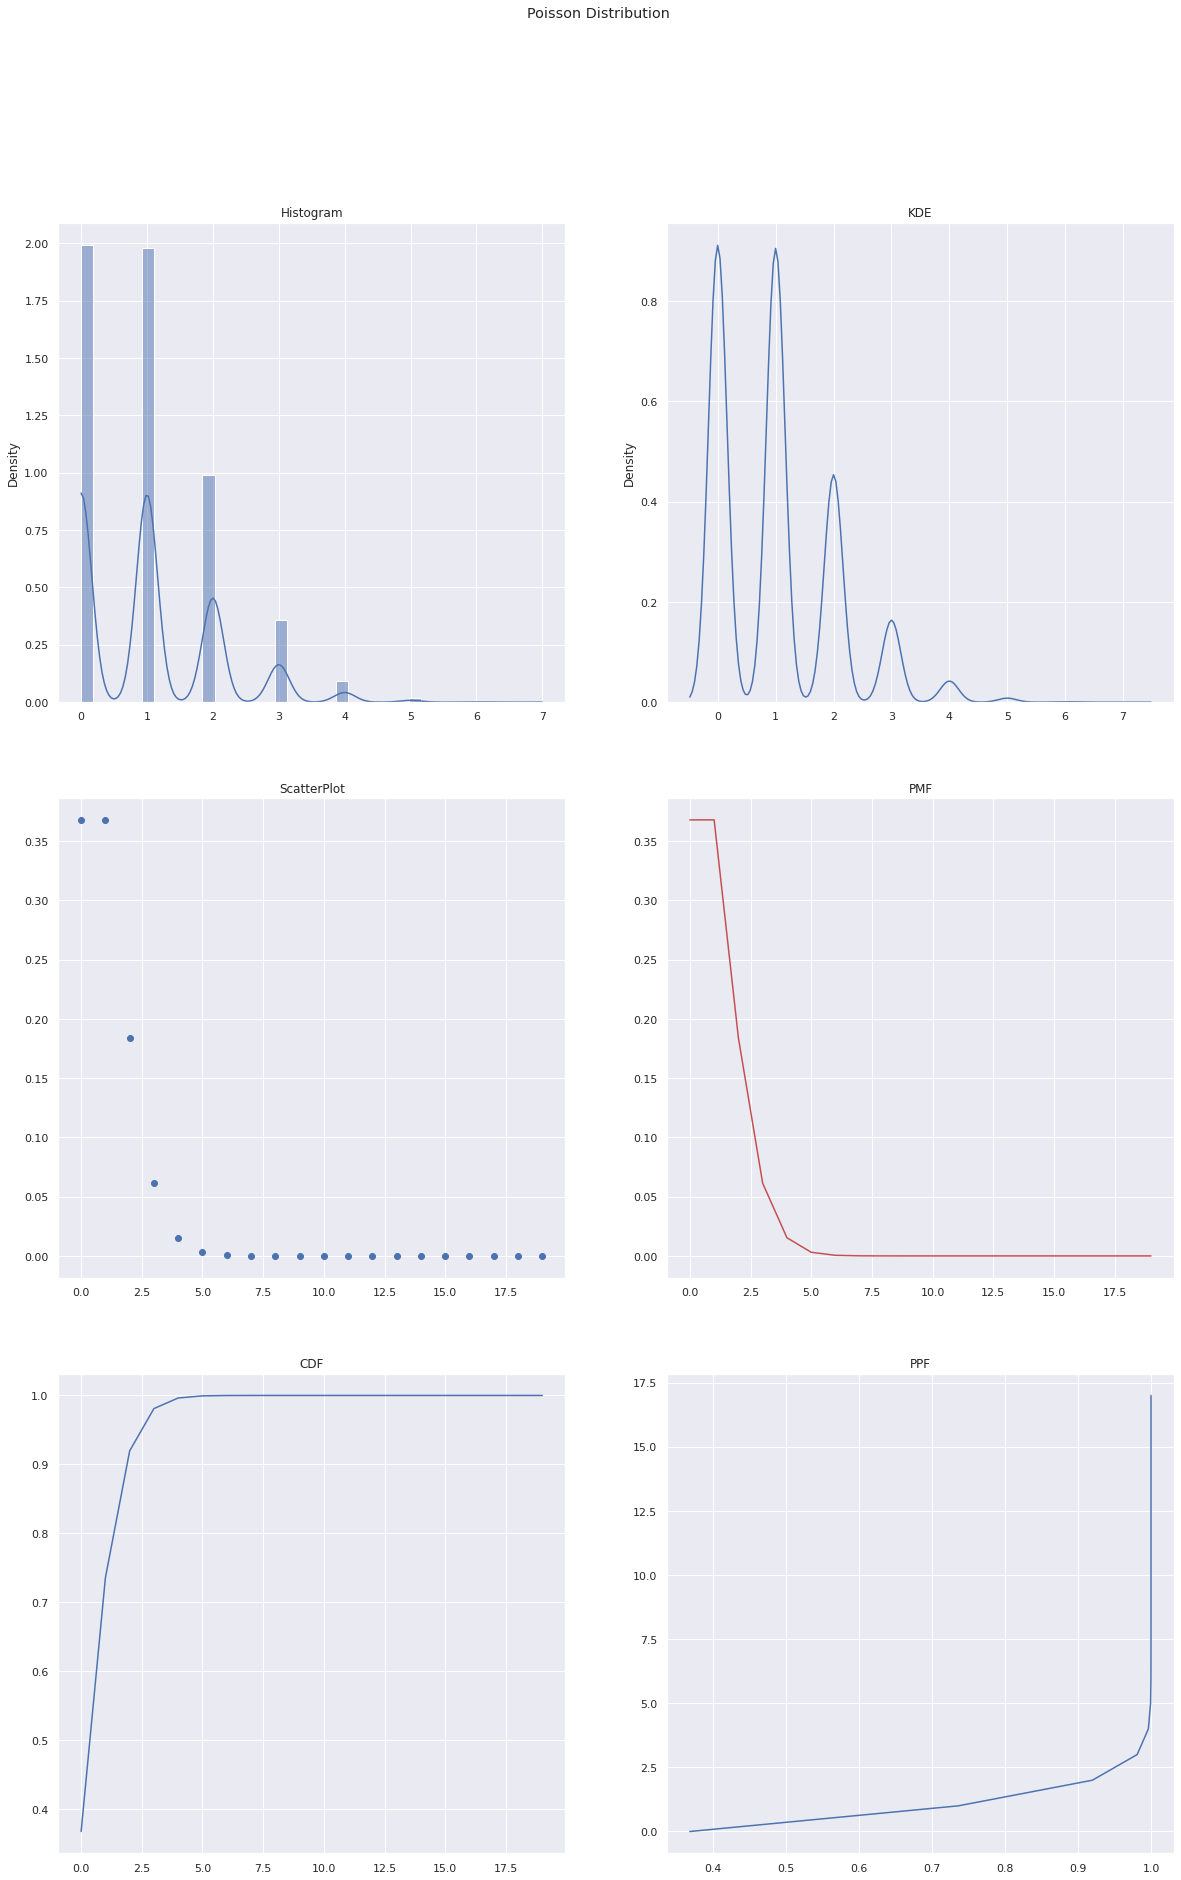

In [24]:
poisson_dist()

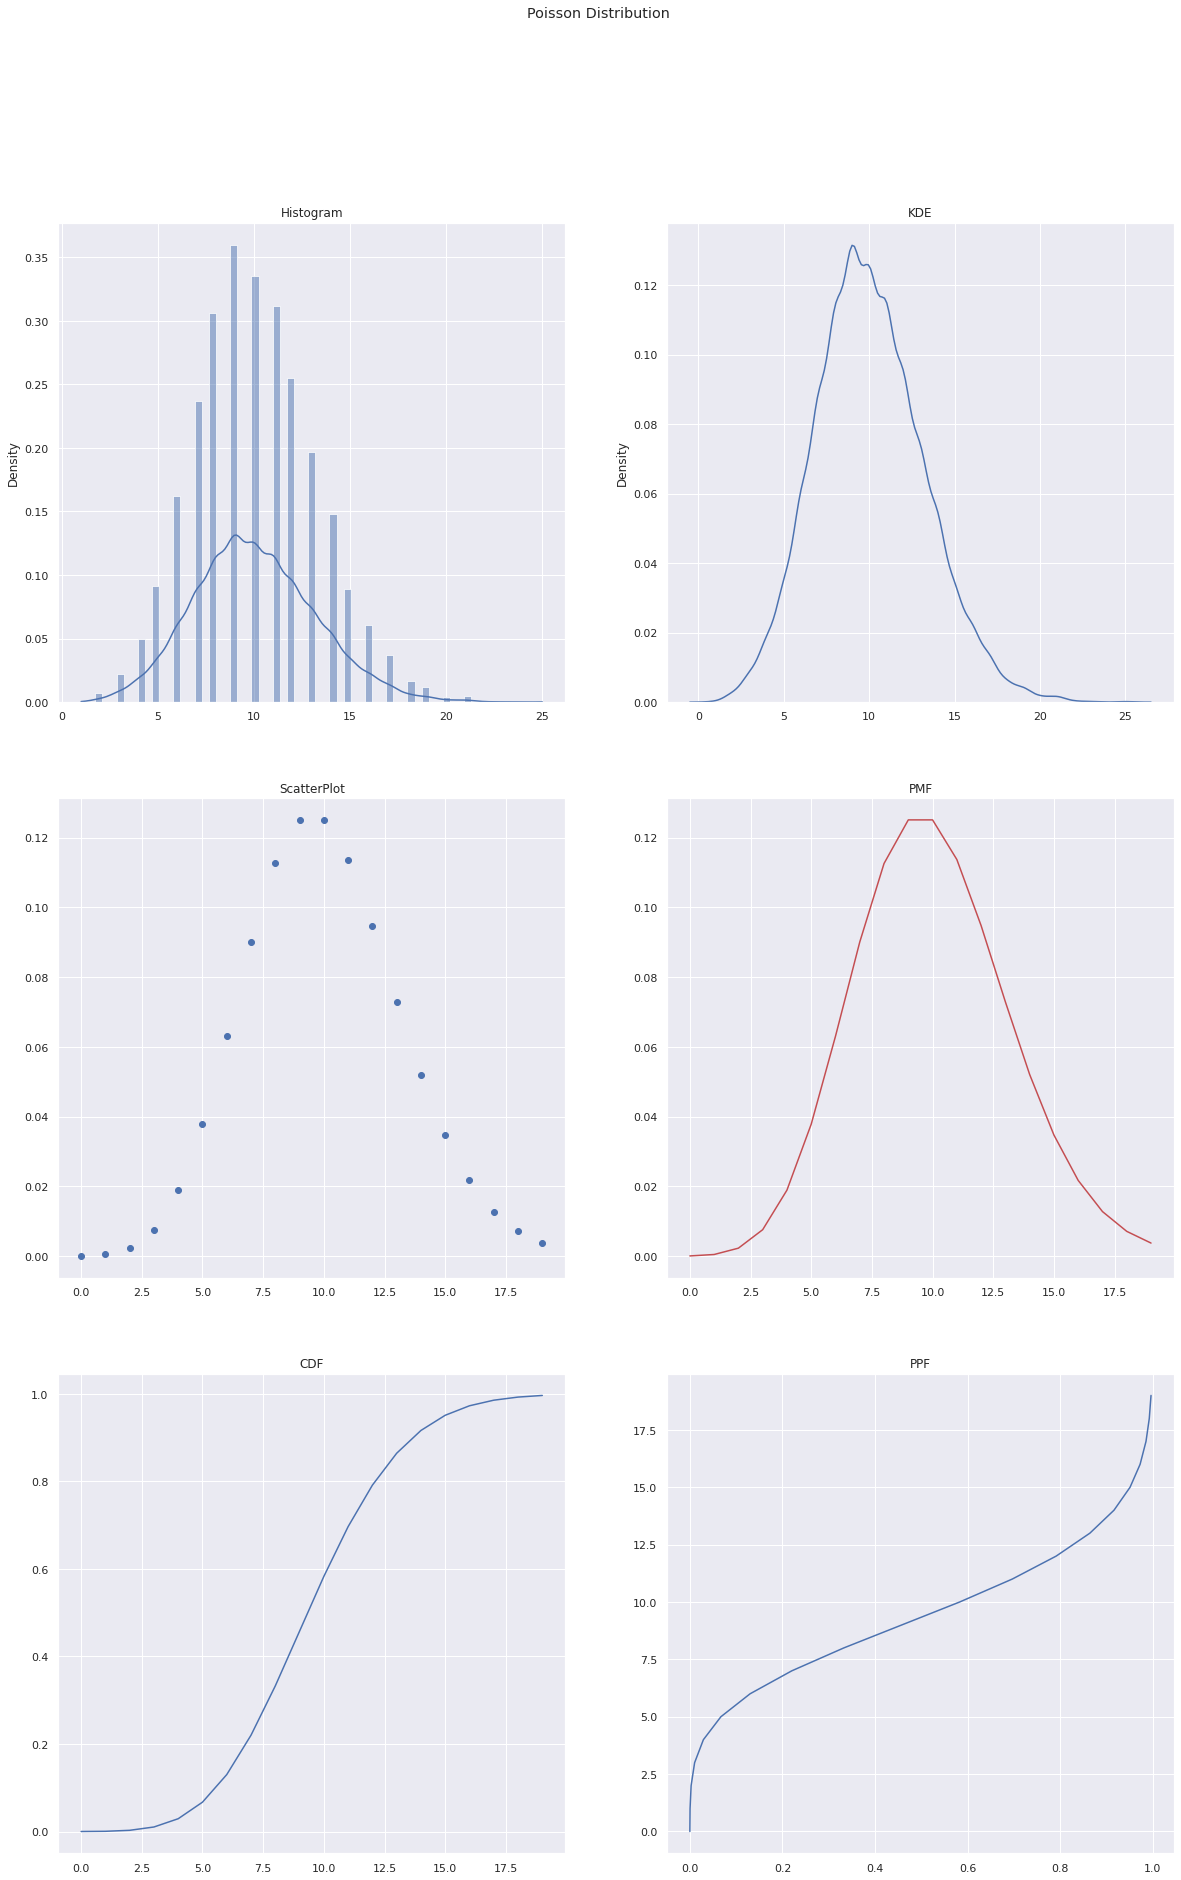

In [25]:
poisson_dist(10)